In [627]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
%matplotlib inline

In [628]:
# Load .env enviroment variables
load_dotenv()

True

In [629]:
#Pull in and read CSV files
csvpath = Path("Resources/Seattle_Apparel_CPI.csv")
seattleCPI_apparel_df = pd.read_csv(csvpath)

seattleCPI_apparel_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [630]:
seattleCPI_apparel_df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], inplace=True)
seattleCPI_apparel_df


,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [631]:
seattleCPI_apparel_df.dropna(inplace= True)
seattleCPI_apparel_df

,Unnamed: 0,Unnamed: 1
10,Year,Annual
11,2012,136.170
12,2013,133.148
13,2014,130.279
14,2015,129.292
15,2016,130.264
16,2017,130.814
17,2018,127.582
18,2019,128.442
19,2020,124.045


In [632]:
seattleCPI_apparel_df.reset_index(drop=True, inplace=True)
seattleCPI_apparel_df.columns= seattleCPI_apparel_df.iloc[0]
seattleCPI_apparel_df


,Year,Annual
0,Year,Annual
1,2012,136.170
2,2013,133.148
3,2014,130.279
4,2015,129.292
5,2016,130.264
6,2017,130.814
7,2018,127.582
8,2019,128.442
9,2020,124.045


In [633]:
seattleCPI_apparel_df= seattleCPI_apparel_df.drop(seattleCPI_apparel_df.index[0]).set_index("Year")
seattleCPI_apparel_df

,Annual
Year,
2012,136.170
2013,133.148
2014,130.279
2015,129.292
2016,130.264
2017,130.814
2018,127.582
2019,128.442
2020,124.045


In [634]:
seattleCPI_apparel_df.rename(columns= {'Annual': 'Seattle Apparel CPI'}, inplace= True)
seattleCPI_apparel_df

,Seattle Apparel CPI
Year,
2012,136.170
2013,133.148
2014,130.279
2015,129.292
2016,130.264
2017,130.814
2018,127.582
2019,128.442
2020,124.045


In [635]:
csvpath1 = Path("Resources/Seattle_FoodAwayFromHome_CPI.csv")
seattleCPI_FoodAway_df = pd.read_csv(csvpath1)

seattleCPI_FoodAway_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [636]:
def drop_columns_CPI(df):
    columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
    return (df).drop(columns= columns, inplace= True)

drop_columns_CPI(seattleCPI_FoodAway_df)

seattleCPI_FoodAway_df

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [637]:
seattleCPI_FoodAway_df.dropna(inplace=True)
seattleCPI_FoodAway_df

,Unnamed: 0,Unnamed: 1
10,Year,Annual
11,2012,259.603
12,2013,266.493
13,2014,271.982
14,2015,278.738
15,2016,287.958
16,2017,296.622
17,2018,305.532
18,2019,314.927
19,2020,329.670


In [638]:
seattleCPI_FoodAway_df.reset_index(drop=True, inplace=True)
seattleCPI_FoodAway_df.columns= seattleCPI_FoodAway_df.iloc[0]
seattleCPI_FoodAway_df

,Year,Annual
0,Year,Annual
1,2012,259.603
2,2013,266.493
3,2014,271.982
4,2015,278.738
5,2016,287.958
6,2017,296.622
7,2018,305.532
8,2019,314.927
9,2020,329.670


In [639]:
seattleCPI_FoodAway_df= seattleCPI_FoodAway_df.drop(seattleCPI_FoodAway_df.index[0]).set_index("Year")
seattleCPI_FoodAway_df

,Annual
Year,
2012,259.603
2013,266.493
2014,271.982
2015,278.738
2016,287.958
2017,296.622
2018,305.532
2019,314.927
2020,329.670


In [640]:
seattleCPI_FoodAway_df.rename(columns= {'Annual': 'Seattle Food Away from Home CPI'}, inplace= True)
seattleCPI_FoodAway_df

,Seattle Food Away from Home CPI
Year,
2012,259.603
2013,266.493
2014,271.982
2015,278.738
2016,287.958
2017,296.622
2018,305.532
2019,314.927
2020,329.670


In [641]:
csvpath3 = Path("Resources/Seattle_RentalEquivalent_CPI.csv")
seattleCPI_RentalEquivalent_df = pd.read_csv(csvpath3)
seattleCPI_RentalEquivalent_df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [642]:
drop_columns_CPI(seattleCPI_RentalEquivalent_df)
seattleCPI_RentalEquivalent_df

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [643]:
seattleCPI_RentalEquivalent_df.dropna(inplace= True)
seattleCPI_RentalEquivalent_df

,Unnamed: 0,Unnamed: 1
10,Year,Annual
11,2012,283.351
12,2013,291.631
13,2014,305.272
14,2015,320.433
15,2016,339.302
16,2017,360.153
17,2018,382.350
18,2019,400.300
19,2020,414.762


In [644]:
seattleCPI_RentalEquivalent_df.reset_index(drop=True, inplace=True)
seattleCPI_RentalEquivalent_df.columns= seattleCPI_RentalEquivalent_df.iloc[0]
seattleCPI_RentalEquivalent_df

,Year,Annual
0,Year,Annual
1,2012,283.351
2,2013,291.631
3,2014,305.272
4,2015,320.433
5,2016,339.302
6,2017,360.153
7,2018,382.350
8,2019,400.300
9,2020,414.762


In [645]:
seattleCPI_RentalEquivalent_df= seattleCPI_RentalEquivalent_df.drop(seattleCPI_RentalEquivalent_df.index[0]).set_index("Year")
seattleCPI_RentalEquivalent_df

,Annual
Year,
2012,283.351
2013,291.631
2014,305.272
2015,320.433
2016,339.302
2017,360.153
2018,382.350
2019,400.300
2020,414.762


In [646]:
seattleCPI_RentalEquivalent_df.rename(columns= {'Annual': 'Seattle Rental Equivalent CPI'}, inplace= True)
seattleCPI_RentalEquivalent_df

,Seattle Rental Equivalent CPI
Year,
2012,283.351
2013,291.631
2014,305.272
2015,320.433
2016,339.302
2017,360.153
2018,382.350
2019,400.300
2020,414.762


In [647]:
list_of_df = [seattleCPI_apparel_df, seattleCPI_FoodAway_df, seattleCPI_RentalEquivalent_df]
seattle_CPI_data= pd.concat(list_of_df, join='inner', axis='columns')
seattle_CPI_data

,Seattle Apparel CPI,Seattle Food Away from Home CPI,Seattle Rental Equivalent CPI
Year,,,
2012,136.170,259.603,283.351
2013,133.148,266.493,291.631
2014,130.279,271.982,305.272
2015,129.292,278.738,320.433
2016,130.264,287.958,339.302
2017,130.814,296.622,360.153
2018,127.582,305.532,382.350
2019,128.442,314.927,400.300
2020,124.045,329.670,414.762


In [652]:
seattle_CPI_data["Seattle Apparel CPI"]= pd.to_numeric(seattle_CPI_data["Seattle Apparel CPI"])
seattle_CPI_data["Seattle Rental Equivalent CPI"]= pd.to_numeric(seattle_CPI_data["Seattle Rental Equivalent CPI"])
seattle_CPI_data["Seattle Food Away from Home CPI"]= pd.to_numeric(seattle_CPI_data["Seattle Food Away from Home CPI"])

seattle_CPI_data.dtypes


0
Seattle Apparel CPI                float64
Seattle Food Away from Home CPI    float64
Seattle Rental Equivalent CPI      float64
dtype: object

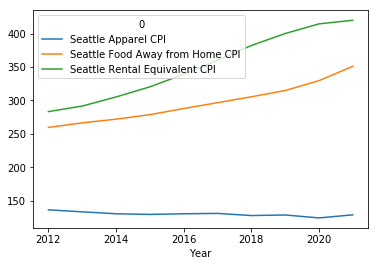

In [653]:
seattle_CPI_data.plot()

In [658]:
seattle_CPI_data.to_csv("Resources\seattle_cpi_data.csv")